**Perspective projection**

Projection matrix scaled by the focal lenght $f$.

Point in 3D space convert to homogeneous coordinates

$$
\begin{pmatrix}
f & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z \\
1
\end{pmatrix}
=
\begin{pmatrix}
fx \\
fy \\
z
\end{pmatrix}
$$

Scale invariant so

$$
\begin{pmatrix}
fx \\
fy \\
z
\end{pmatrix}
\equiv
\begin{pmatrix}
f \frac{x}{z} \\
f \frac{y}{z}
\end{pmatrix}
$$

In [1]:
import numpy as np

In [16]:
f = 50
A = np.array(
    [
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 1, 0]
    ]
)

# A point a z == focal length should have the same (x, y) coordinates when projected!
point = np.array([200, 100, 50])

A, point

(array([[50,  0,  0,  0],
        [ 0, 50,  0,  0],
        [ 0,  0,  1,  0]]),
 array([200, 100,  50]))

In [14]:
# Convert the point to homogenous coordinates.
homo_p = np.append(point, [1])

homo_p

array([200, 100,  50,   1])

In [17]:
# Projection:
_projection = A @ homo_p

# A point a z == focal length should have the same (x, y) coordinates when projected!
_projection, _projection[:-1] / _projection[-1]

(array([10000,  5000,    50]), array([200., 100.]))

In [18]:
# Z is at 2x the focal lenght so all other coordinates should be 1/2 their original size.
point = np.array([200, 100, 100])

homo_p = np.append(point, [1])
_projection = A @ homo_p
_projection[:-1] / _projection[-1]

array([100.,  50.])

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def project_point(point_3d, f):
    """
    Project a 3D point onto a 2D image plane using perspective projection.
    
    INPUTS
    ------
    point_3d: numpy array of shape (3,) representing [X, Y, Z]
    f: focal length of the camera
    
    RETURNS
    -------
    numpy array of shape (2,) representing [x, y] in the image plane
    """
    X, Y, Z = point_3d
    
    # Basic perspective projection equations:
    x = f * (X / Z)
    y = f * (Y / Z)
    return np.array([x, y])

# Create some example 3D points.
def create_cube_points(size=1.0):
    """Create 8 points representing corners of a cube centered at origin

    we're using what's called a "camera-centered coordinate system" where:
    1. The camera center (center of projection) is at the origin (0,0,0).
    2. The camera is looking along the positive Z axis
    3. X points to the right
    4. Y points up
    """
    points = []
    for x in [-size/2, size/2]:
        for y in [-size/2, size/2]:
            for z in [2 + -size/2, 2 + size/2]:  # Offset in Z to put cube in front of camera.
                points.append(np.array([x, y, z]))
    return np.array(points)

# Create visualization.
def visualize_projection(points_3d, f):
    # Project all points.
    points_2d = np.array([project_point(p, f) for p in points_3d])
    
    # Create figure with two subplots.
    fig = plt.figure(figsize=(15, 6))
    
    # 3D plot.
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='b', marker='o')
    
    # Plot camera center and image plane.
    ax1.scatter([0], [0], [0], c='r', marker='^', s=100, label='Camera')
    
    # Draw lines from camera to points.
    for point in points_3d:
        ax1.plot([0, point[0]], [0, point[1]], [0, point[2]], 'g--', alpha=0.3)

    # Set the correct viewing angle to match our mental model.
    # elevation: rotation around the x-axis in degrees.
    # azimuth: rotation around the z-axis in degrees
    ax1.view_init(elev=0, azim=10)  # Adjust these angles to get the desired view
    #ax1.view_init(elev=20, azim=-60)
    
    # Label axes.
    ax1.set_xlabel('X (right)')
    ax1.set_ylabel('Y (up)')
    ax1.set_zlabel('Z (into world)')
    ax1.set_title('3D Space with Camera and Points')
    ax1.set_xticks([])
    ax1.legend()
    
    # 2D plot (projection).
    ax2 = fig.add_subplot(122)
    ax2.scatter(points_2d[:, 0], points_2d[:, 1], c='b', marker='o')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid(True)
    ax2.set_title('2D Image Plane (Projection)')
    
    # Make axis equal to preserve shape.
    ax2.set_aspect('equal')

    plt.tight_layout()
    plt.show()

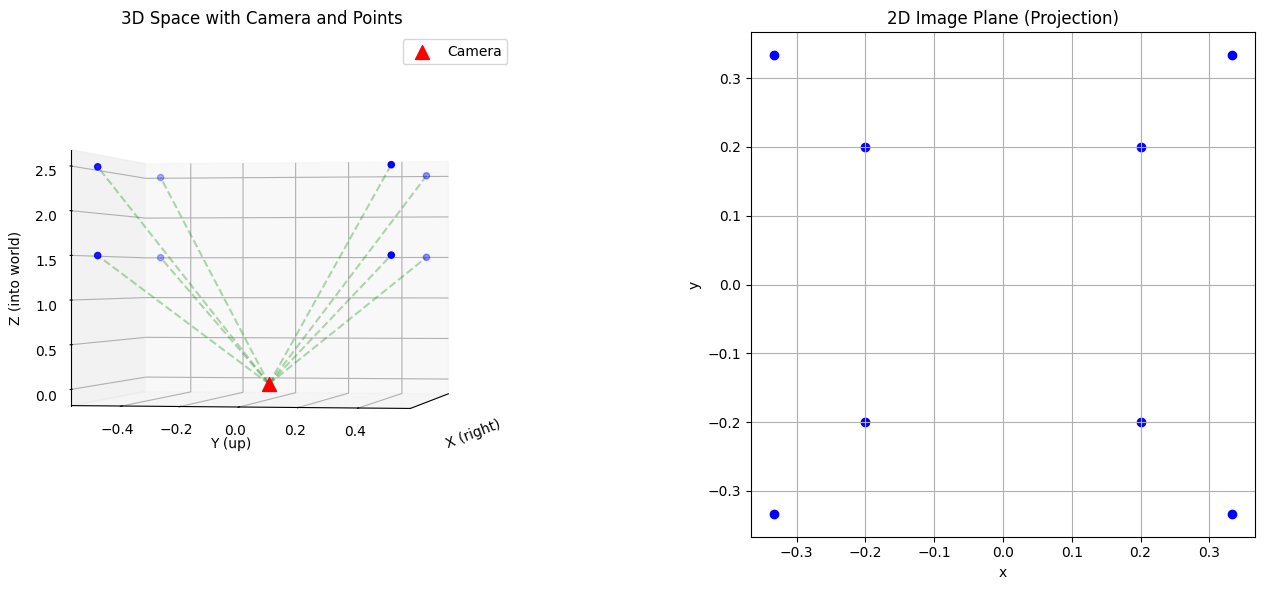

In [76]:
cube_points = create_cube_points(size=1.0)
focal_length = 1.0
visualize_projection(cube_points, focal_length)


Projection with focal length 0.5:


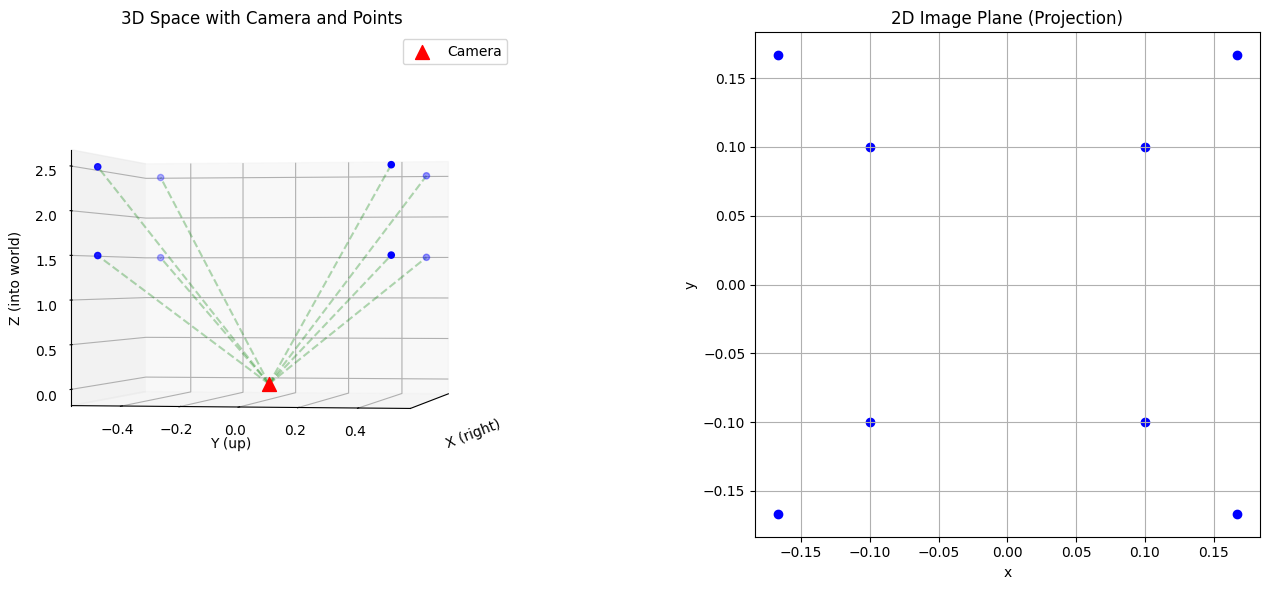


Projection with focal length 3.0:


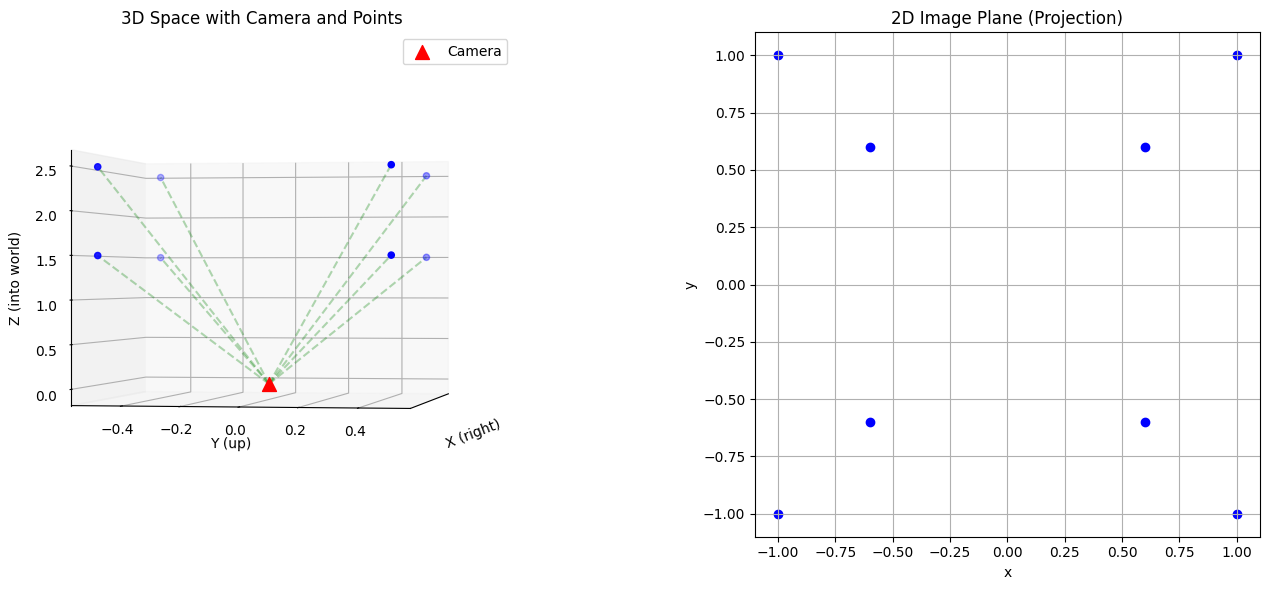

In [77]:
# Let's also demonstrate what happens with different focal lengths.
for f in [0.5, 3.0]:
    print(f"\nProjection with focal length {f}:")
    visualize_projection(cube_points, f)